# **Fake and Real Logo Detection**

Author: Shreya Ganjoo
Last updated 28-06-2023

### **Metadata of the dataset**
The dataset link - https://drive.google.com/drive/folders/1vW3NbLP1_X9nzTwdEsQFKbH5zsWOY5De?usp=sharing

## **Import Necessary Libraries**

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [ ]:
p = Path().cwd()
q = p/"/content/drive/MyDrive/Logo Detection"  # used p to create a path to the data
target_dict = {"Fake": 0, "Original": 1}  # creating dictionary mapping to data labels to integer labels
images = []  # create an empty list
labels = []  # create an empty list

for fldr in q.iterdir():
    current_label = fldr.name  # get the name of the current label
    print(current_label)
    for subfldr1 in fldr.iterdir():
        current_sublabel1 = subfldr1.name  # get the name of the current sublabel (transportation, food and beverages, electronics and fashion)
        print(current_sublabel1)
        for subfldr2 in subfldr1.iterdir():
            current_sublabel2 = subfldr2.name  # get the name of the current sublabel (fake, original)
            print(current_sublabel2)
            for img in subfldr2.iterdir():
                if img.is_file():  # check if the current item is a file
                    img = load_img(img, color_mode="grayscale")  # load image as grayscale
                    img_array = img_to_array(img)  # convert the image to a NumPy array
                    img_array_resized = smart_resize(img_array, (256, 256))  # resize the image to 256 by 256
                    images.append(img_array_resized)  # add resized image to list of images
                    labels.append(target_dict[current_sublabel2])  # add label for this image to the list of labels

Food and Beverages
Mirinda
Fake
Original
Monster
Fake
Original
Pepsi
Fake
Original
Fanta
Original
Fake
Pizzahut
Fake
Original
Horlicks
Fake
Original
Burger King
Fake
Original
Cadbury
Fake
Original
Bru
Fake
Original
7-Up
Original
Fake
Brittania
Fake
Original
Cocacola
Fake
Original


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Fashion
Reebok
Original
Levis
Fake
Original
Louis Vuitton
Fake
Original
Nike
Original
Fake
Gap
Original
Fake
Crocs
Fake
Original
Adidas
Original
Fake
Calvin Klein
Fake
Original
Chanel
Fake
Original
Lakme
Fake
Original
Gucci
Original
Fake
Forever 21
Fake
Original
Electronics
Philips
Fake
Original
Samsung
Original
Fake
Lenevo
Fake
Original
Oppo
Fake
Original
HP
Fake
Original
Dell
Fake
Original
Panasonic
Fake
Original
Nikon
Original
Fake
Transportation
Hyundai
Original
Fake
Ford
Original
Fake
Volvo
Fake
Original
Yamaha
Original
Fake


In [ ]:
len(images)

1804

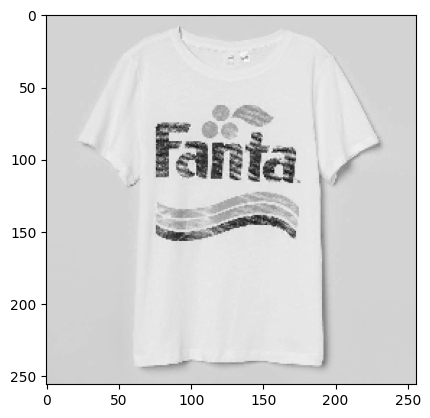

In [ ]:
plt.imshow(images[190], cmap='gray')

In [ ]:
target_dict

{'Fake': 0, 'Original': 1}

In [ ]:
print(labels[190])

0


**Making 80% split for training data**

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

**Converting Values to NumPy arrays**

In [ ]:
train_images = np.array(train_images)
test_images = np.array(test_images)
val_images = np.array(val_images)


**Scaling Values in range of 0-1**

In [ ]:
train_images = train_images / 255
test_images = test_images/ 255
val_images = val_images / 255

**Shape of the Image Data Arrays**

In [ ]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(1082, 256, 256, 1)
(361, 256, 256, 1)
(361, 256, 256, 1)


**Flatten the Images to use them as features**

In [ ]:
train_features = train_images.reshape(train_images.shape[0], -1)
val_features = val_images.reshape(val_images.shape[0], -1)
test_features = test_images.reshape(test_images.shape[0], -1)

## **SVM Model**

**Import Necessary Libraries**

In [ ]:
from sklearn.svm import SVC


# train the SVM model
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(train_features, train_labels)

SVC(C=1, kernel='linear', random_state=42)

**Evaluate the model on validation and test set**

In [ ]:
val_preds = svm.predict(val_features)
val_acc = accuracy_score(val_labels, val_preds)
print("Validation accuracy:", val_acc)

test_preds = svm.predict(test_features)
test_acc = accuracy_score(test_labels, test_preds)
print("Test accuracy:", test_acc)

Validation accuracy: 0.7534626038781164
Test accuracy: 0.7285318559556787


**calculate precision, recall, and F1 score for the predicted labels**

In [ ]:

val_precision = precision_score(val_labels, val_preds, average='weighted')
val_recall = recall_score(val_labels, val_preds, average='weighted')
val_f1 = f1_score(val_labels, val_preds, average='weighted')

print("Validation precision:", val_precision)
print("Validation recall:", val_recall)
print("Validation F1 score:", val_f1)

Validation precision: 0.7564559189582641
Validation recall: 0.7534626038781164
Validation F1 score: 0.7452842324897989


In [ ]:
test_precision = precision_score(test_labels, test_preds, average='weighted')
test_recall = recall_score(test_labels, test_preds, average='weighted')
test_f1 = f1_score(test_labels, test_preds, average='weighted')
print("Test precision:", test_precision)
print("Test recall:", test_recall)
print("Test F1 score:", test_f1)


Test precision: 0.7230308567086634
Test recall: 0.7285318559556787
Test F1 score: 0.7234245739236583


**Confusion Matrix**

In [ ]:
cm=confusion_matrix(test_labels,test_preds)
cm

array([[ 76,  59],
       [ 39, 187]])

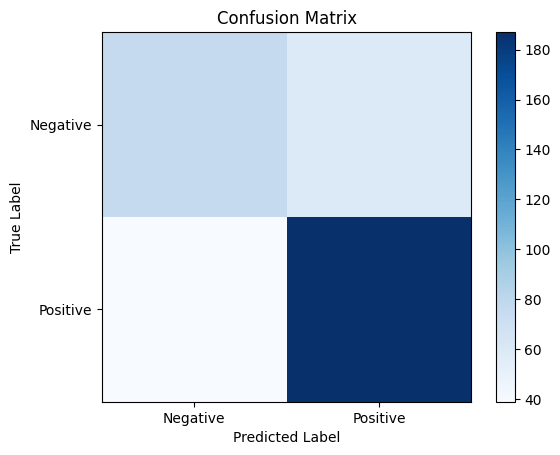

In [ ]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

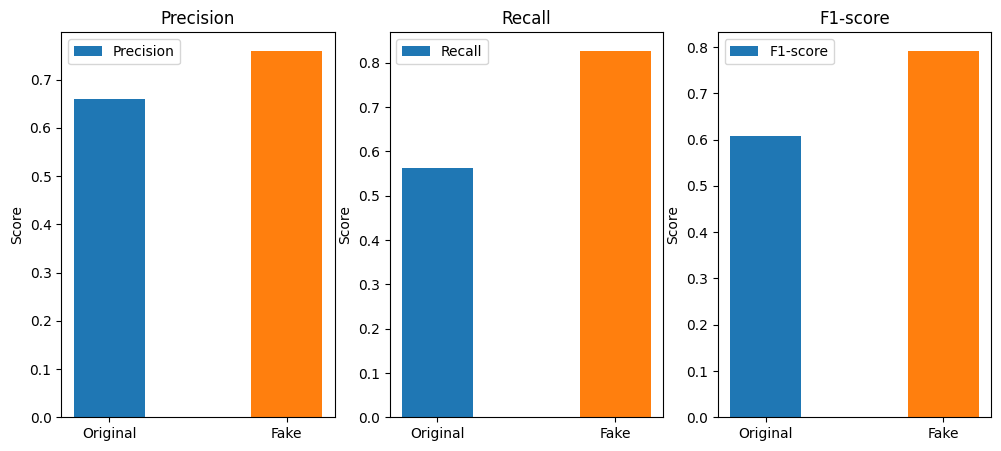

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_preds)
class_names = ['Original', 'Fake']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

**Converting Labels to Categorical**

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)

In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeUniform()
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same", input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.summary()
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model for 20 epochs with a batch size of 25

history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(val_images, val_labels), batch_size=10, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Evaluate the model on validation data
validation_loss, validation_acc = model.evaluate(val_images, val_labels)

# Print the test and validation accuracy
print('Test accuracy:', test_acc)
print('Validation accuracy:', validation_acc)


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 128)     0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     1

**Plot the Training and Validation Loss**

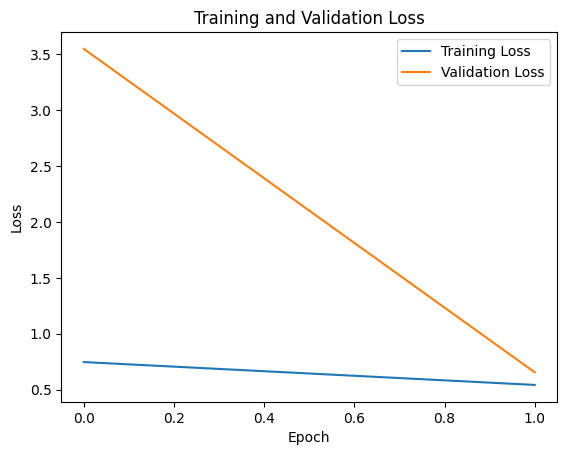

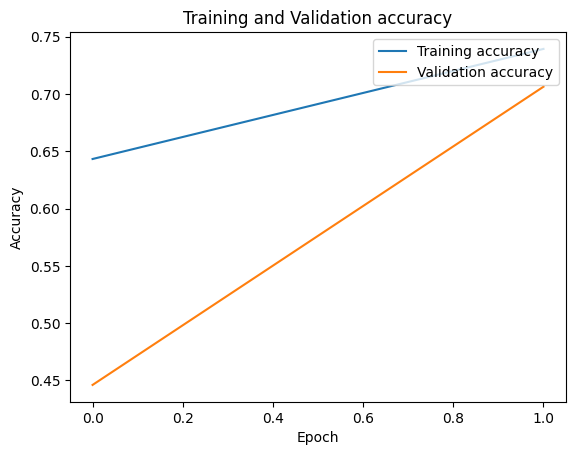

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()

**Convert the predicted labels from one-hot encoding to integer encoding and get the classification report for the test data**

In [ ]:
from sklearn.metrics import classification_report

test_pred_labels = np.argmax(model.predict(test_images), axis=1)
print(classification_report(np.argmax(test_labels, axis=1), test_pred_labels))


12/12 [==============================] - 206s 17s/step
              precision    recall  f1-score   support

           0       0.53      0.71      0.61       135
           1       0.78      0.62      0.69       226

    accuracy                           0.66       361
   macro avg       0.66      0.67      0.65       361
weighted avg       0.69      0.66      0.66       361



**Convert one-hot encoded labels back to integer labels and generate the confusion matrix**

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix


test_labels = np.argmax(test_labels, axis=1)

pred_label = model.predict(test_images)
cm = confusion_matrix(test_labels, np.argmax(pred_label, axis=1))

print('Confusion matrix:')
print(cm)

12/12 [==============================] - 204s 17s/step
Confusion matrix:
[[ 96  39]
 [ 85 141]]


**Visual Representation of Model's Prediction**

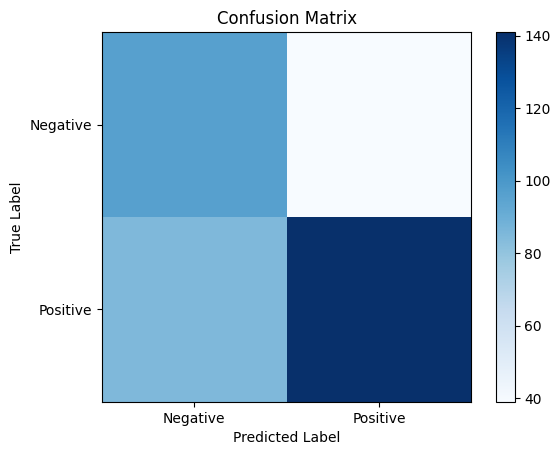

In [ ]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

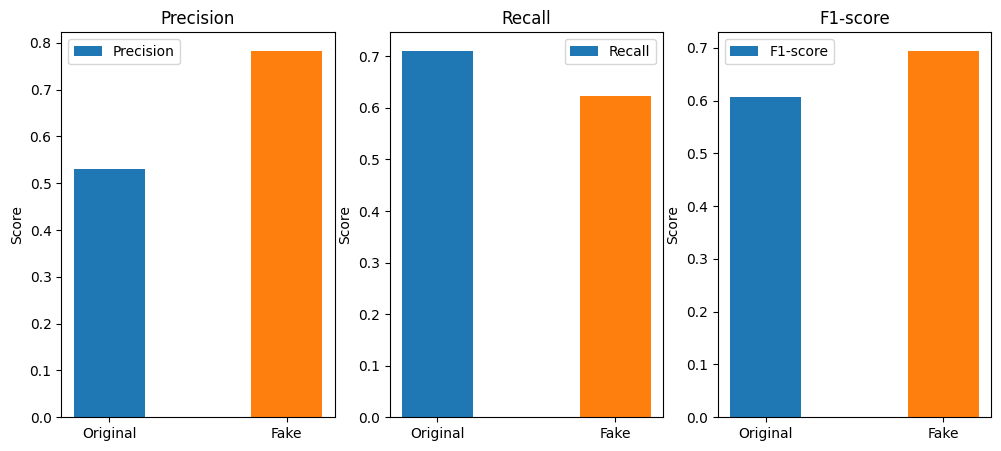

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_pred_labels)
class_names = ['Original', 'Fake']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()